In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
df = pd.read_csv(r"C:\Users\197as\OneDrive\Documents\Bootcamp_2025\Data_Science\Ecommerce_Customers .csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.shape

(500, 8)

In [4]:
 df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
df.duplicated().sum()

0

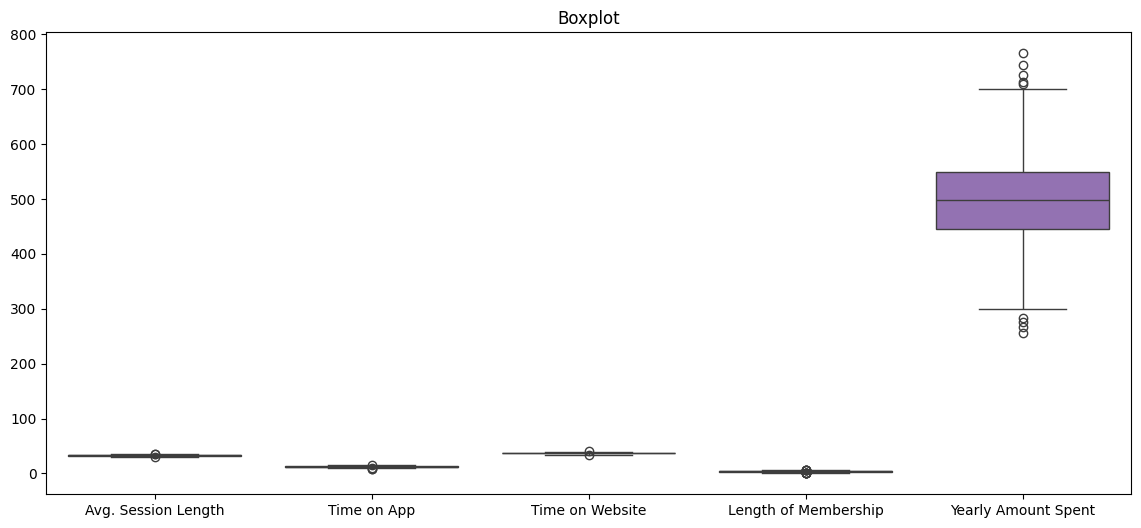

In [7]:
plt.figure(figsize = (14,6))
sns.boxplot(data = df)
plt.title("Boxplot")
plt.show()


In [8]:
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    df = df.drop(outliers)
df = df.reset_index(drop=True)

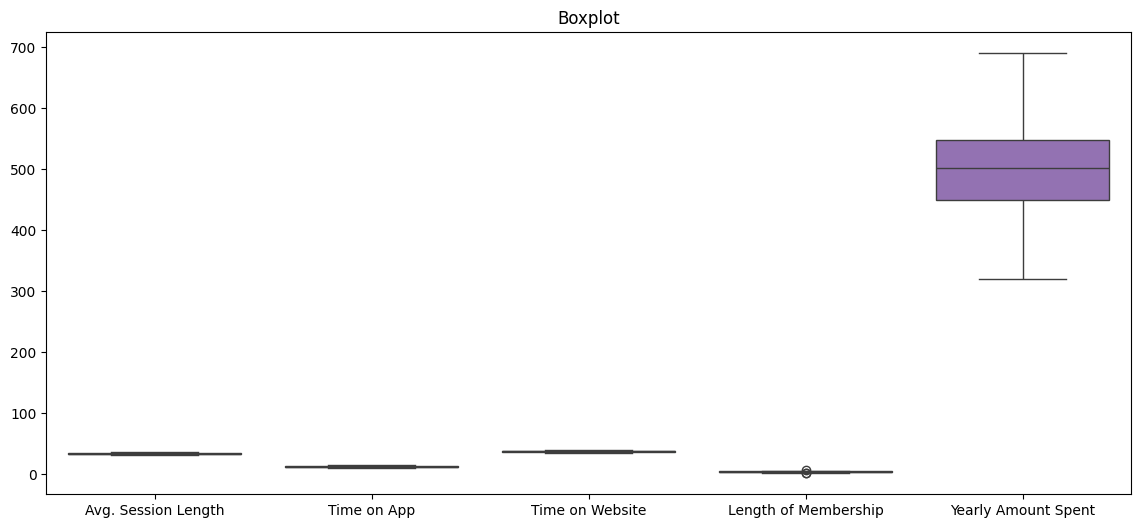

In [9]:
plt.figure(figsize = (14,6))
sns.boxplot(data = df)
plt.title("Boxplot")
plt.show()

In [10]:
df['Total Time'] = df['Time on App'] + df['Time on Website']
df['State'] = df['Address'].apply(lambda x: x.split()[-2])
df['Email Provider'] = df['Email'].apply(lambda x : x.split("@")[1])
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Total Time,State,Email Provider
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,52.233319,MI,fernandez.com
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,48.378420,CA,hotmail.com
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,48.440875,DC,yahoo.com
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,50.438796,OH,gmail.com
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,50.331842,PR,davidson-herman.com
...,...,...,...,...,...,...,...,...,...,...,...
469,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438,49.984144,UT,craig-evans.com
470,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004,48.886004,CA,gmail.com
471,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146,49.831985,TN,hotmail.com
472,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510,49.231509,TX,hotmail.com


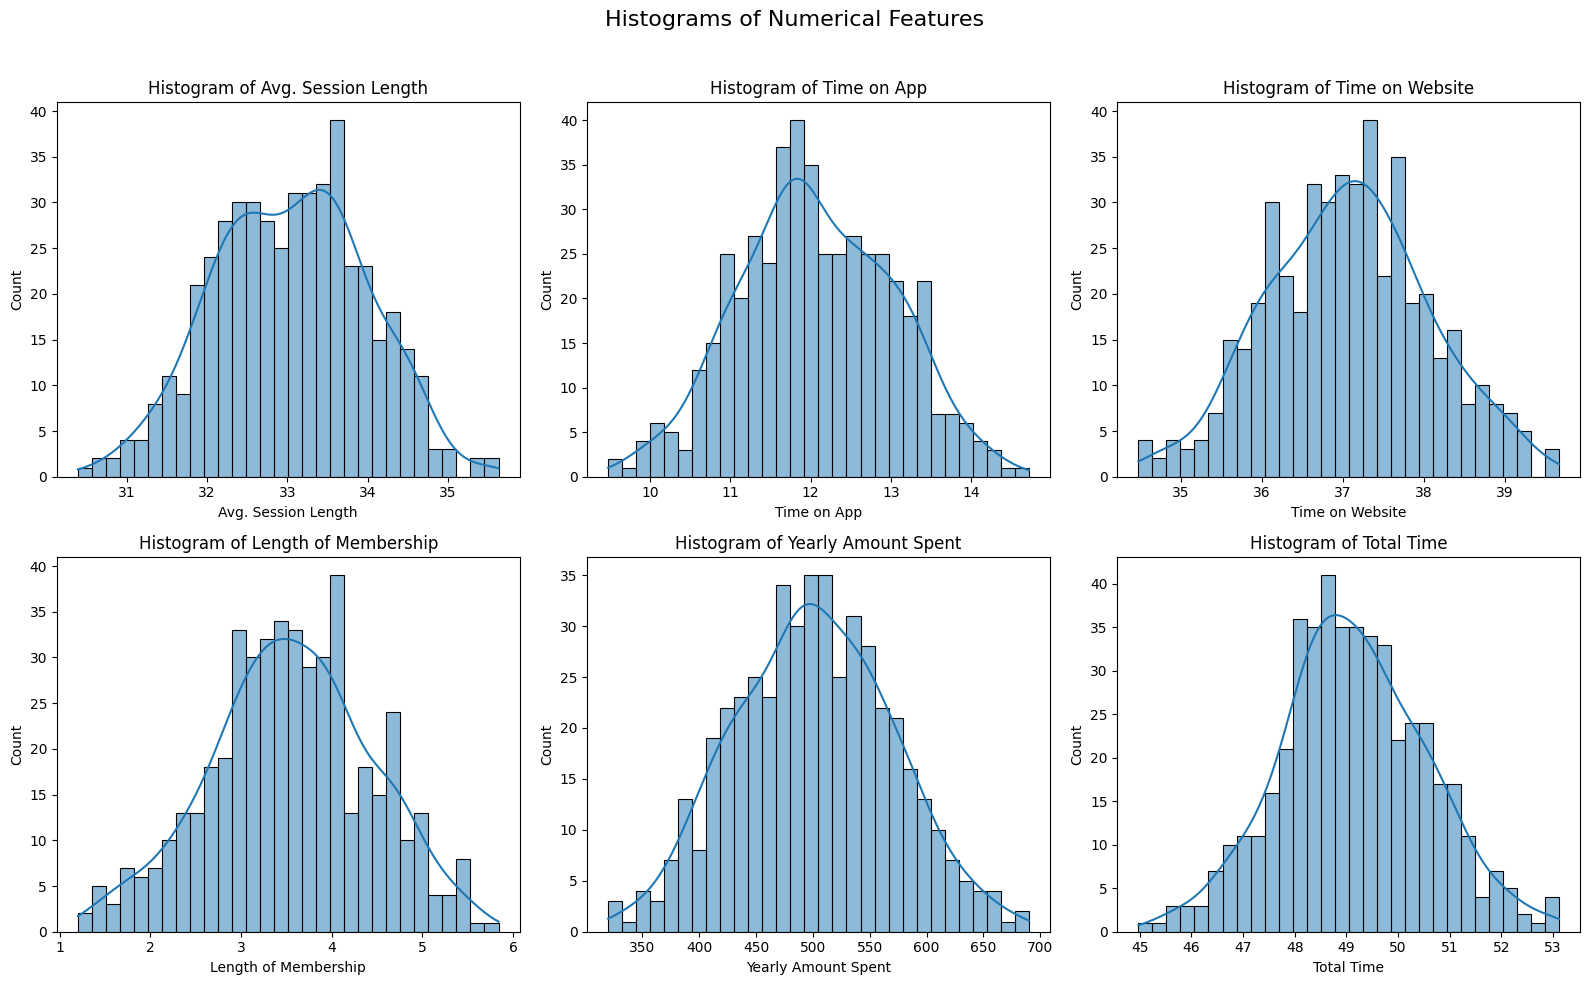

In [11]:
num_cols = df.select_dtypes(include=np.number).columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Customer with the max time and spending

In [12]:
s = df.select_dtypes(np.number).idxmax()
pd.Series(data = df.loc[s]['Email'].values,index=s.index)

Avg. Session Length             zscott@wright.com
Time on App               alejandro75@hotmail.com
Time on Website            randall85@williams.com
Length of Membership        edwardbrown@yahoo.com
Yearly Amount Spent     randyrobinson@hotmail.com
Total Time                     pkline@hotmail.com
dtype: object

# Customer with the min time and spending

In [13]:
s = df.select_dtypes(np.number).idxmin()
pd.Series(data = df.loc[s]['Email'].values,index=s.index)

Avg. Session Length     douglasdunlap@boone-rose.com
Time on App                       david80@knight.com
Time on Website               alvareznancy@lucas.biz
Length of Membership      wheelernancy@hernandez.com
Yearly Amount Spent     douglasdunlap@boone-rose.com
Total Time                        halljohn@yahoo.com
dtype: object

## States with the max time and spending

In [14]:
df.groupby(by='State').sum().max()

Email                   wrightpeter@yahoo.combakerdrew@gmail.comdtaylo...
Address                 Unit 6538 Box 8980\nDPO AP 09026-4941Unit 6174...
Avatar                                     WhiteSmokeLightCyanDarkMagenta
Avg. Session Length                                            561.630711
Time on App                                                    208.023153
Time on Website                                                631.420865
Length of Membership                                             58.24048
Yearly Amount Spent                                           8430.159687
Total Time                                                     839.444018
Email Provider          yahoo.commoore.comyahoo.combrown-white.comhotm...
dtype: object

In [15]:
df.groupby(by='State').sum().idxmax()

Email                   MP
Address                 AP
Avatar                  ID
Avg. Session Length     AE
Time on App             AE
Time on Website         AE
Length of Membership    AE
Yearly Amount Spent     AE
Total Time              AE
Email Provider          RI
dtype: object

## States with the min time and spending

In [16]:
df.groupby(by='State').sum().idxmin()

Email                   OK
Address                 UT
Avatar                  WI
Avg. Session Length     UT
Time on App             ID
Time on Website         UT
Length of Membership    ID
Yearly Amount Spent     ID
Total Time              UT
Email Provider          AZ
dtype: object

# Differences between customers over spending time and money

In [17]:
df.describe().loc['std',:]

Avg. Session Length      0.943465
Time on App              0.956327
Time on Website          0.996848
Length of Membership     0.888891
Yearly Amount Spent     69.000831
Total Time               1.425597
Name: std, dtype: float64

# Differences between customers over spending time and money : Coefficient of variation

In [18]:
df.describe().loc['std',:]/df.describe().loc['mean',:] * 100

Avg. Session Length      2.855748
Time on App              7.925189
Time on Website          2.689086
Length of Membership    25.056857
Yearly Amount Spent     13.789017
Total Time               2.901264
dtype: float64

# Differences between states over spending time and money 

In [19]:
df[df.columns[3:-1]].groupby(by='State').mean().std(axis = 0)

Avg. Session Length      0.397323
Time on App              0.348369
Time on Website          0.381906
Length of Membership     0.388229
Yearly Amount Spent     29.114334
Total Time               0.578957
dtype: float64

# Differences between states over spending time and money : coefficient of variation

In [20]:

state_means = df[df.columns[3:-1]].groupby(by='State').mean()
state_cv = state_means.std(axis=0) / state_means.mean(axis=0) * 100
state_cv

Avg. Session Length      1.203794
Time on App              2.882999
Time on Website          1.030752
Length of Membership    10.931337
Yearly Amount Spent      5.816131
Total Time               1.178305
dtype: float64

# Top 5 states spending time on app

In [21]:
df.groupby(by='State').sum().sort_values(by='Time on App',ascending=False)['Time on App'].head()

State
AE    208.023153
AA    200.954588
DE    142.541137
SC    141.106009
FL    136.081305
Name: Time on App, dtype: float64

# Top 5 Customers spending time on app

In [22]:
df.sort_values(by='Time on App',ascending=False)[['Email','Time on App']].head()

,Email,Time on App
17,alejandro75@hotmail.com,14.715388
246,george02@hotmail.com,14.426491
272,bhill@pierce-kane.info,14.325655
323,vancealicia@hotmail.com,14.288015
233,vmartin@yahoo.com,14.220979


# Linear Regression

In [23]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Total Time']]
y = df['Yearly Amount Spent']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
print(y_pred)

[448.10483036 564.10483036 438.10483036 512.10483036 510.10483036
 516.10483036 348.10483036 554.10483036 466.10483036 478.10483036
 492.10483036 526.10483036 572.10483036 566.10483036 482.10483036
 546.10483036 336.10483036 470.10483036 574.10483036 498.10483036
 396.10483036 592.10483036 442.10483036 512.10483036 552.10483036
 576.10483036 556.10483036 560.10483036 512.10483036 446.10483036
 374.10483036 356.10483036 512.10483036 616.10483036 434.10483036
 594.10483036 384.10483036 504.10483036 530.10483036 570.10483036
 446.10483036 520.10483036 570.10483036 474.10483036 578.10483036
 528.10483036 546.10483036 422.10483036 496.10483036 506.10483036
 582.10483036 500.10483036 454.10483036 540.10483036 552.10483036
 340.10483036 490.10483036 476.10483036 610.10483036 510.10483036
 598.10483036 418.10483036 484.10483036 550.10483036 550.10483036
 538.10483036 408.10483036 516.10483036 352.10483036 496.10483036
 482.10483036 500.10483036 436.10483036 426.10483036 462.10483036
 534.10483

In [28]:
print("R-squared:", r2_score(y_test, y_pred))

R-squared: 0.9811349721325215


In [29]:
try:
    avg_session_length = float(input("Enter Avg. Session Length: "))
    time_on_app = float(input("Enter Time on App: "))
    time_on_website = float(input("Enter Time on Website: "))
    length_of_membership = float(input("Enter Length of Membership: "))
    total_time = float(input("Enter Total Time: "))
    features = [[avg_session_length, time_on_app, time_on_website, length_of_membership, total_time]]
    prediction = model.predict(features)
    print(f"Predicted Yearly Amount Spent: ₹{prediction[0]:.2f}")
except ValueError:
    print("Enter valid numbers for all features.")

Predicted Yearly Amount Spent: ₹594.10


c:\Users\197as\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Decision Tree

In [30]:
median_spent = y.median()
y_class = (y >= median_spent).astype(int)

In [31]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.3, random_state=42)

In [32]:

decision_tree_cls = DecisionTreeClassifier(criterion='gini', random_state=0)
decision_tree_cls.fit(X_train_cls, y_train_cls)
y_pred_cls = decision_tree_cls.predict(X_test_cls)


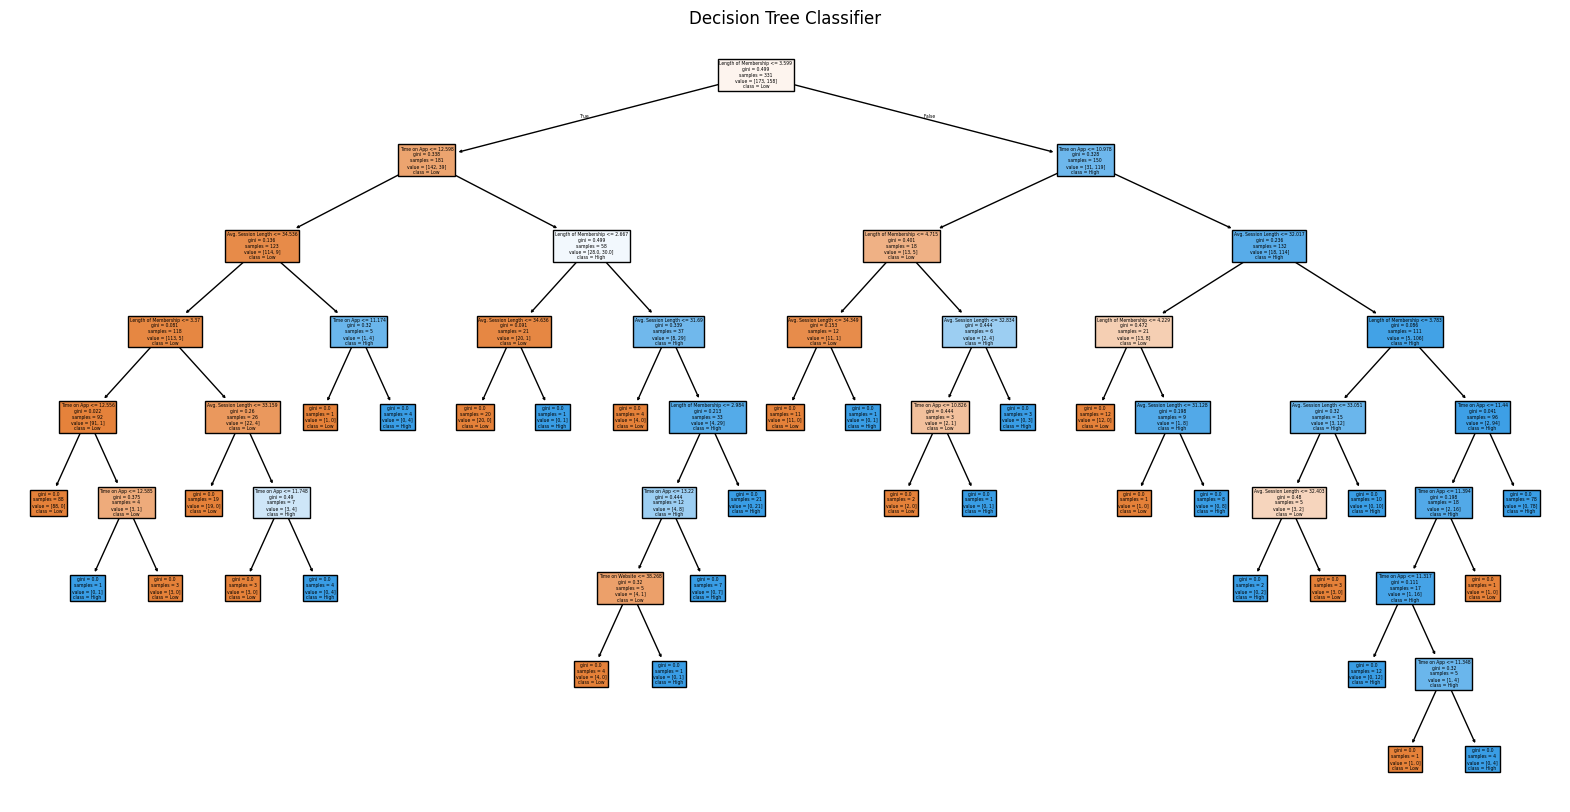

In [33]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree_cls, feature_names=X.columns, class_names=['Low', 'High'], filled=True)
plt.title("Decision Tree Classifier")
plt.show()

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Total Time']]
y = df['Yearly Amount Spent']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [45]:
clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train, y_train_cls)

y_pred_log = clf.predict(X_test)
acc_log = accuracy_score(y_test_cls, y_pred_log) * 100
print(f"Logistic Regression model accuracy : {acc_log:.2f}%")

Logistic Regression model accuracy : 52.45%
